# Example of the Kohn-Sham Strictly Correlated Electrons (KSSCE) method

The KSSCE [1, 2] method is obtained from the following approximation to the universal functional $F[n]$:

$$ F[n] = \min_{\Psi \rightarrow n} \langle \Psi | \hat{T} + \hat{V}_\mathrm{ee} | \Psi \rangle \approx \min_{\Psi \rightarrow n} \langle \Psi | \hat{T} | \Psi \rangle + \langle \Psi | \hat{V}_\mathrm{ee} | \Psi \rangle = T_s[n] + V_\mathrm{ee}^\mathrm{SCE}[n],$$

where $T_s[n]$ is the KS kinetic energy and $V_\mathrm{ee}^\mathrm{SCE}[n]$ is the SCE electron-electron interaction energy. In DFT one could also frame the approximation as $E_\mathrm{xc}[n] \approx V_\mathrm{ee}^\mathrm{SCE}[n]$. The SCE minimizer is a slightly strange state, in 1D the state only depends on the position of one electron, all the other electrons are fixed by the position of the first electron.

Note that we obtain a lower bound to the universal functional. In the limit of strong correlation, the KSSCE method becomes exact, while for weak correlation it is not a quantitatively accurate approximation. It is one of the few functionals that is capable to capture phenomena such as Mott localization. [5]

For one-dimensional systems implementing $V_\mathrm{ee}^\mathrm{SCE}[n]$ and its functional derivative $v_\mathrm{SCE}[n](x)$ is straightforward and computationally efficient. The dependence on the density arises via the cumulant

$$
\mathrm{Ne}(x) = \int^x_{-\infty} n(x') \mathrm{d}x',
$$

and its inverse $\mathrm{Ne}^{-1}(x)$. These are used to compute the so-called co-motion functions, which give the position of the $N-1$ electrons as a function of the position of the first electron. The co-motion functions are defined as

$$
f_i(x) = \mathrm{Ne}^{-1}(x)(\mathrm{Ne}(x)+i-1-N \Theta(\mathrm{Ne}(x)-N-i+1)),
$$
where $\Theta$ is the Heaviside step function. The index $i$ denotes the electron. Note that for $i=1$ one obtains $f_i(x)=x$. We now denote our 1D interaction as $w(|x_1-x_2|)$. Then,

$$v_\mathrm{SCE}[n](x) = \int^x_{-\infty} \sum_{i=2}^N w'(x-f_i(x)),$$

and

$$V_\mathrm{ee}^\mathrm{SCE}[n] = \int^{\infty}_{-\infty} n(x) \sum_{i=2}^N w(x-f_i(x)) \mathrm{d}x.$$

For further information: reference 1 introduces the method, reference 2 applies it to quantum wires, reference 3 discusses the derivative discontinuity in the strong-interaction limit, reference 4 applies the method to (1D) model chemical systems, and reference 5 applies the method to the Mott-Anderson localization in 1D.

### References
1. F. Malet and P. Gori-Giorgi, Strong correlation in Kohn-Sham density functional theory, Phys. Rev. Lett. 109, 246402 (2012). DOI: [10.1103/PhysRevLett.109.246402](https://dx.doi.org/10.1103/PhysRevLett.109.246402)
2. F. Malet, A. Mirtschink, J. C. Cremon, S. M. Reimann, and P. Gori-Giorgi. Kohn-Sham density functional theory for quantum wires in arbitrary correlation regimes. Phys. Rev. B 87, 115146 (2013) DOI: [10.1103/PhysRevB.87.115146](http://dx.doi.org/10.1103/PhysRevB.87.115146)
3. A. Mirtschink, M. Seidl, and P. Gori-Giorgi. Derivative discontinuity in the strong-interaction limit of density functional theory. Phys. Rev. Lett.  111, 126402 (2013) DOI: [10.1103/PhysRevLett.111.126402](http://dx.doi.org/10.1103/PhysRevLett.111.126402)
4. F. Malet, A. Mirtschink, K. J. H. Giesbertz, L. O. Wagner, and P. Gori-Giorgi. Exchange-correlation functionals from the strongly-interacting limit of DFT: Applications to model chemical systems. Phys. Chem. Chem. Phys. 16, 14551 (2014) DOI: [10.1039/c4cp00407h](http://dx.doi.org/10.1039/c4cp00407h)
5. A. Marie, D. P. Kooi, J. Grossi, M. Seidl, Z. Musslimani, K.J.H. Giesbertz, P. Gori-Giorgi. Real space Mott-Anderson electron localization with long-range interactions. Physical Review Research 4, 043192 (2022) DOI: [10.1103/PhysRevResearch.4.043192](https://dx.doi.org/10.1103/PhysRevResearch.4.043192)

## Example
As an example we will take something similar to ref. 2. We have a harmonic potential with two electrons (both spin-up). As the strength of the harmonic confinement ($\omega$) decreases, the system becomes more strongly correlated.

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.kssce.solve: convergence = 7.8104e-10, tolerance = 1e-09


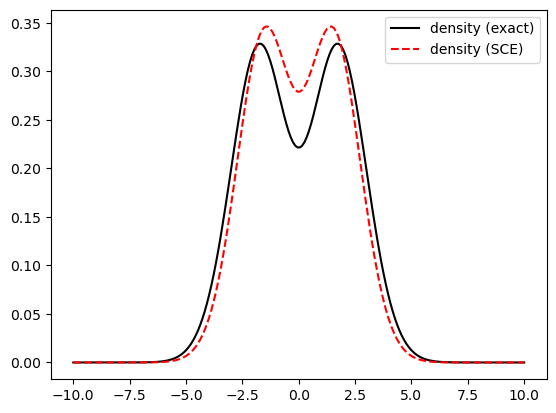

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import iDEA
import scipy

# Grid parameters
L = 10
n_points = 200
x = np.linspace(-L, L, n_points)

# External potential parameters
omega = 0.25 # 0.25
v_ext = 0.5 * omega**2 * x**2

# Interaction parameters
strength = 1.0
softening = 1.0
v_int = iDEA.interactions.softened_interaction(x, strength=strength, softening=softening)

# Set up iDEA system
s = iDEA.system.System(x, v_ext, v_int, electrons='uu')

# Quick hack to store the interaction and its gradient in the iDEA system
s.interaction = lambda x: strength / (np.abs(x) + softening)
s.dinteraction = lambda x: -strength*np.sign(x) / (np.abs(x) + softening)**2
s.ddinteraction = lambda x: 2*strength / (np.abs(x) + softening)**3

# Find exact ground state
ground_state = iDEA.methods.interacting.solve(s, k=0)

# Find SCE ground state
ground_state_sce = iDEA.methods.kssce.solve(s, k=0, tol=1e-9, mixing=0.5)

n_sce = iDEA.observables.density(s, state=ground_state_sce)
n_exact = iDEA.observables.density(s, state=ground_state)

plt.plot(s.x, n_exact, "k-", label="density (exact)")
plt.plot(s.x, n_sce, "r--", label="density (SCE)")
plt.legend()
plt.show()